Bias and Variance Trade off Analysis
================

-Tuhin Mahmud



Calculating bias and variance
-----------------------------

In [11]:
%matplotlib inline  
from numpy.linalg import norm
import numpy as np
import pylab as pl

In [35]:
def f(size):
    x = np.linspace(0, 5, size)
    y = 2 * np.sin(x * 1.75)
    return (x,y)
def sample(size):
    x = np.linspace(0, 5, size)
    y = 2 * np.sin(x * 1.75) + pl.randn(x.size)
    return (x,y)

In [37]:
def generate_trade_off_graph(nsamples,nmodels,maxdegrees):
    n_samples = nsamples
    f_x, f_y = f(n_samples)
    n_models = nmodels
    max_degree = maxdegrees
    var_vals =[]
    bias_vals = []
    error_vals = []
    for degree in xrange(1, max_degree):
        avg_y = np.zeros(n_samples)
        models = []
        for i in xrange(n_models):
            (x,y) = sample(n_samples)
            model = fit_polynomial(x, y, degree)
            p_y = apply_polynomial(model, x)
            avg_y = avg_y + p_y
            models.append(p_y)
        avg_y = avg_y / n_models
        bias_2 = norm(avg_y - f_y)/f_y.size
        bias_vals.append(bias_2)
        variance = 0
        for p_y in models:
            variance += norm(avg_y - p_y)
        variance /= f_y.size * n_models
        var_vals.append(variance)
        error_vals.append(variance + bias_2)
    pl.plot(range(1, max_degree), bias_vals, label='bias')
    pl.plot(range(1, max_degree), var_vals, label='variance')
    pl.plot(range(1, max_degree), error_vals, label='error')
    pl.legend()

## Changing the number of samples

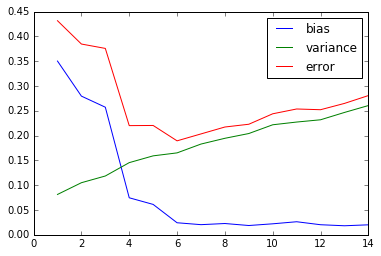

In [38]:
generate_trade_off_graph(15,100,15)

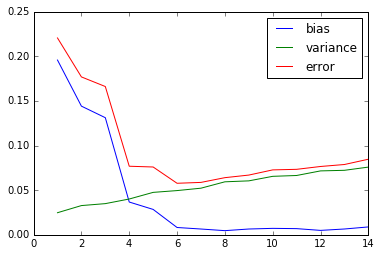

In [39]:
generate_trade_off_graph(50,100,15)

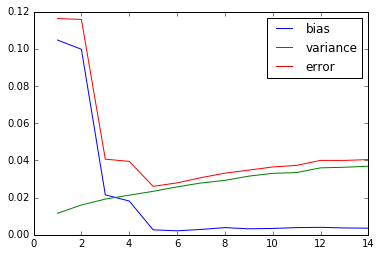

In [16]:
generate_trade_off_graph(100,100,15)

## Changing number of models

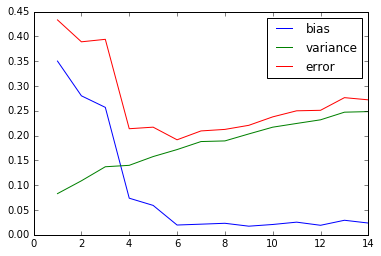

In [40]:
generate_trade_off_graph(15,100,15)

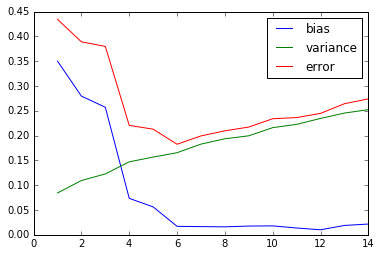

In [41]:
generate_trade_off_graph(15,200,15)

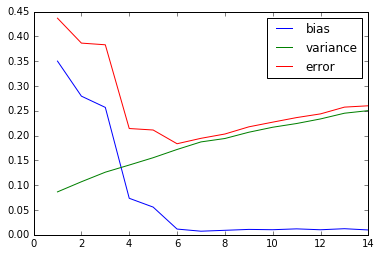

In [42]:
generate_trade_off_graph(15,500,15)

### Changing both number of models and number of samples

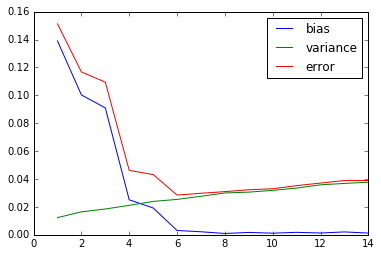

In [43]:
generate_trade_off_graph(100,500,15)

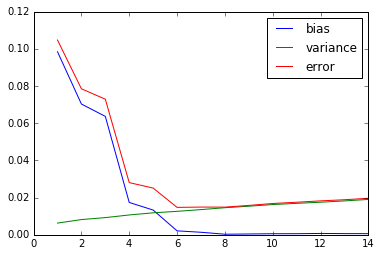

In [44]:
generate_trade_off_graph(200,1000,15)

## Reference

Machine learning class support material, Universidad Nacional de Colombia, 2013